In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
'''done = True
for step in range(100000):
    if done:
        env.reset()
    state, reward, done, info, _ = env.step(env.action_space.sample())
    env.render()
env.close()
'''

'done = True\nfor step in range(100000):\n    if done:\n        env.reset()\n    state, reward, done, info, _ = env.step(env.action_space.sample())\n    env.render()\nenv.close()\n'

In [4]:
from gym.wrappers import FrameStack, GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [5]:
class CustomJoypadSpace(JoypadSpace):
    def reset(self, **kwargs):
        kwargs.pop('seed', None)
        kwargs.pop('options', None)
        return super().reset(**kwargs)

In [6]:
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True,render_mode="human" )
env = CustomJoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim = True)
env = DummyVecEnv([lambda : env])
env = VecFrameStack(env, 4, channels_order='last')

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


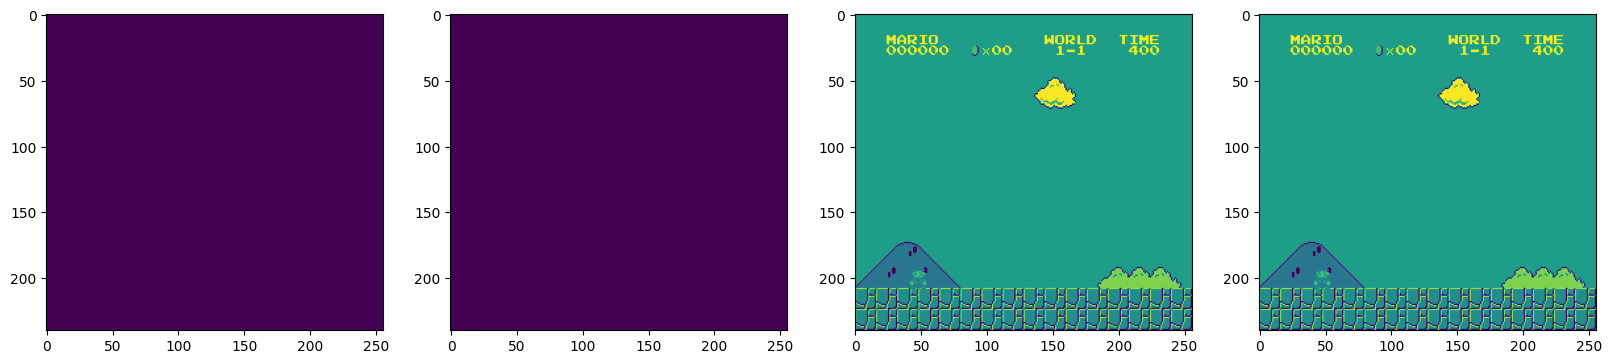

In [9]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [10]:
import os
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [13]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [14]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [15]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_3


C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 42  |
|    iterations      | 1   |
|    time_elapsed    | 12  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 52           |
|    iterations           | 2            |
|    time_elapsed         | 19           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 5.078141e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00657     |
|    learning_rate        | 1e-06        |
|    loss                 | 93.6         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000511    |
|    value_loss           | 358          |
------------------------------------------
-----------------------

In [ ]:
model.save('MarioModel')

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\adity\miniconda3\envs\tfgpu\lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
